In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:

data = {
    "Hours_Studied": [1,2,3,4,5,6,7,8,9,10],
    "Pass": [0,0,0,0,1,1,1,1,1,1]
}

df = pd.DataFrame(data)
df


,Hours_Studied,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [3]:
x = np.array(df[["Hours_Studied"]])
y = np.array(df["Pass"])
m, n = x.shape
print(m, n)

10 1


<Axes: xlabel='Hours_Studied', ylabel='Pass'>

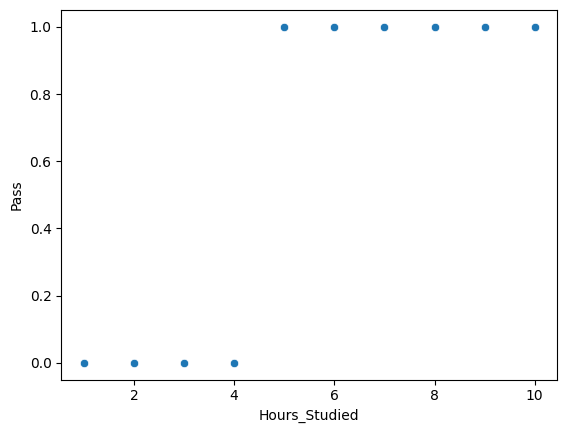

In [4]:
sns.scatterplot(x="Hours_Studied", y="Pass", data=df)

<Axes: xlabel='Pass', ylabel='Hours_Studied'>

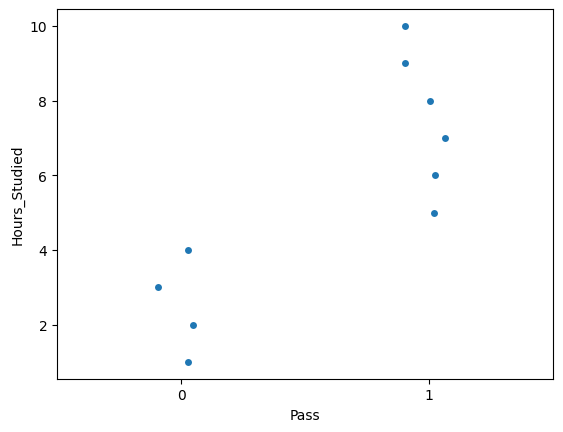

In [5]:
sns.stripplot(x="Pass", y="Hours_Studied", data=df, jitter=True)

## Training Model

In [6]:
def predict(w, b, x):
    z = np.dot(x, w) + b
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

def cost_function(w, b, x, y):
    m, n = x.shape
    y_pred = predict(w, b, x)
    cost = (-1/m) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return cost

def gradient(w, b, x, y):
    m, n = x.shape
    y_pred = predict(w, b, x)
    dw = (1/m) * np.dot(x.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

def gradient_descent(w, b, x, y, alpha, epochs):
    cost_his = []
    for i in range(epochs):
        dw, db = gradient(w, b, x, y)

        w -= alpha * dw
        b -= alpha * db

        cost = cost_function(w, b, x, y)
        if i < 1000:
            cost_his.append(cost)

        if i % 100 == 0:
            print(f"Epoch {i} | Cost={cost:.4f} | w={w} | b={b}")

    return w, b, cost_his

def predict_answer(w, b, x):
    s = predict(w, b, x)
    threshold = 0.5
    y_pred = (s >= threshold).astype(int)
    return y_pred



## Gradient Descent

In [7]:
w, b = np.zeros([n, ]), 0
alpha = 0.1
epochs = 1000

w, b, cost_his = gradient_descent(w, b, x, y, alpha, epochs)

Epoch 0 | Cost=0.5247 | w=[0.175] | b=0.010000000000000002
Epoch 100 | Cost=0.3500 | w=[0.43883189] | b=-1.2554813803392941
Epoch 200 | Cost=0.2712 | w=[0.59989182] | b=-2.1248439258000684
Epoch 300 | Cost=0.2275 | w=[0.72528053] | b=-2.772694509104254
Epoch 400 | Cost=0.1997 | w=[0.82798112] | b=-3.2892738300865747
Epoch 500 | Cost=0.1803 | w=[0.91531116] | b=-3.720711835650465
Epoch 600 | Cost=0.1658 | w=[0.99161066] | b=-4.092841925947617
Epoch 700 | Cost=0.1546 | w=[1.0596221] | b=-4.421369781058503
Epoch 800 | Cost=0.1455 | w=[1.12117723] | b=-4.716494020751909
Epoch 900 | Cost=0.1379 | w=[1.17755672] | b=-4.985192164550996


## Predict

In [8]:
x_user = [[3.3]]
print("Hours studies:", x_user)
print("Probability:", predict(w, b, x_user))
print("Answer:", predict_answer(w, b, x_user))

Hours studies: [[3.3]]
Probability: [0.23617883]
Answer: [0]


In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_custom = predict(w, b, x)
print("R²:", r2_score(y, y_pred_custom))
print("MSE:", mean_squared_error(y, y_pred_custom))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_custom)))
print("MAE:", mean_absolute_error(y, y_pred_custom))

R²: 0.8720687391470885
MSE: 0.030703502604698778
RMSE: 0.17522414960472424
MAE: 0.11127217245431562


## Accuracy

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_class = predict_answer(w, b, x)
print("Accuracy:", accuracy_score(y, y_class))
print("Confusion Matrix:\n", confusion_matrix(y, y_class))
print(classification_report(y, y_class))


Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x, y)

# Weights
print("Weights (w):", model.coef_)

# Bias / Intercept
print("Bias (b):", model.intercept_)

Weights (w): [[1.18194943]]
Bias (b): [-5.31167434]


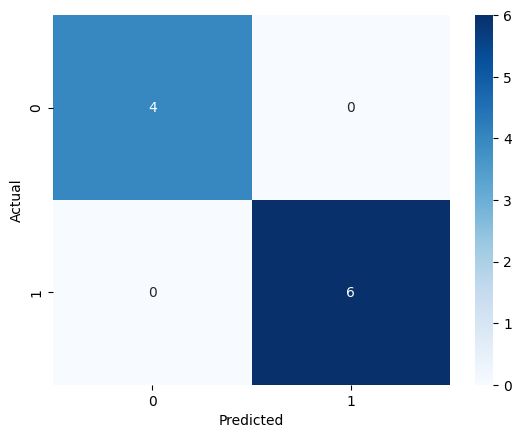

In [13]:
cm = confusion_matrix(y, y_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()